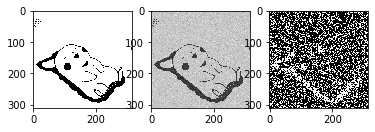

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# y is a noisy pixel
# x is a true pixel

def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        return -1

def add_gaussian_noise(im, prop, sigma):
    N = int(np.round(np.prod(im.shape) * prop))
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    e = sigma * np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    
    return im2

def add_saltnpepper_noise(im, prop):
    N = int(np.round(np.prod(im.shape) * prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    
    return im2

im = Image.open('sample.jpg')
im = np.asarray(im)
im = im / 255

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')

im2 = add_gaussian_noise(im, 0.7, 0.1)
ax2 = fig.add_subplot(132)
ax2.imshow(im2, cmap='gray')

im3 = add_saltnpepper_noise(im, 0.7)
ax3 = fig.add_subplot(133)
ax3.imshow(im3, cmap='gray')

In [104]:
# large value if x_i likely to have generated y_i
def L_i(x_i):
    # ??
    return 1

# large if the configuration of x is something
# we believe is likely
def E_0(x, xx, yy):
    w = 1
    
    s = 0
    N = neighbours(xx, yy, *x.shape)
    for n in N:
        B = x[n[0]][n[1]]
        s += w * (x[xx][yy]) * B
    return s

def prob(x, y):
    Z_1 = 1
    Z_0 = 1
    
    A = 0
    for xx in range(x.shape[0]):
        for yy in range(x.shape[1]):
            # p(y|x)
            part_1 = L_i(x[xx][yy])
            # p(x)
            part_2 = 1/Z_0 * np.exp(E_0(x, xx, yy))
            
            A = part_1 * part_2
        
    A = A * 1/Z_1
    return A

def icm(y):
    x = np.copy(y)
    print(prob(x, y))
    
    for iter in range(10):
        pass
        #for i in range(im.shape):
#            pass
    pass

icm(im2)
#neighbours(1, 1, *im2.shape)
#print(im2[300])

4.9800957363407585
